In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torchvision
import torch
import torchvision.transforms as transforms
import torchvision.models as models

In [2]:
# Load pre-trained ResNet50 model
resnet = models.resnet50(pretrained=True)

# Set model to evaluation mode
resnet.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

/home/heii/all/kilas/backend/flasker/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/heii/all/kilas/backend/flasker/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/heii/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


In [3]:
image = Image.open("images/0bdb15dccc112ec9d7b1b1e89a9f166d--character-design-manga.jpg")

# Apply transformation
image_tensor = transform(image)

# Add batch dimension
image_tensor = torch.unsqueeze(image_tensor, 0)

# Pass image through model
features = resnet(image_tensor)


In [4]:
print(features.shape)

torch.Size([1, 1000])


In [5]:
features = torch.flatten(features, 1)
print(features.shape)

torch.Size([1, 1000])


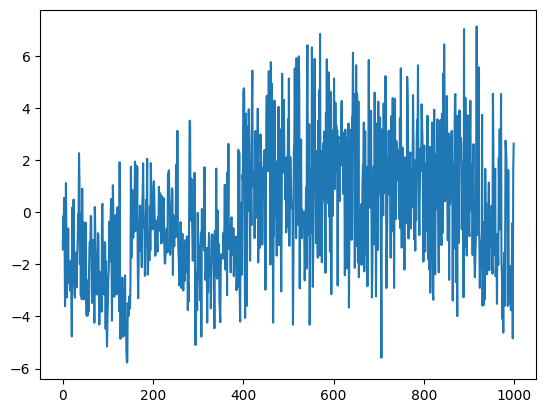

In [6]:
import numpy as np
import matplotlib.pyplot as plt

features_np = features.detach().numpy()

plt.plot(features_np[0])
plt.show()